In [1]:
import pickle as pkl
import numpy as np
import torch
import blosc

In [2]:
def load(file_name):
    with open(file_name, 'rb') as f:
        loaded = pkl.load(f)
    return loaded

colors = ['red', 'green', 'blue', 'purple', 'yellow', 'grey']
types = ['door', 'key', 'ball', 'box']
actions = ["go", "pick", "up", "open", "put"]
fillers = ["to", "next", "the", "a"]
misc = ["follow_teacher"]
vocab = ['PAD'] + colors + types + actions + fillers + misc

def to_text(tokens):
    words = [vocab[token] for token in tokens if not token == 0]
    return words

def to_vocab_index(mission, pad_length=10):
    words = mission.split(" ")
    
    mission_list = [vocab.index(word) for word in words]
    if pad_length is not None:
        mission_list = mission_list + [0] * (pad_length - len(mission_list))
    if len(mission_list) > pad_length:
        raise ValueError("Mission is too long: " + mission + str(pad_length))
    return mission_list



In [3]:
cd meta-mb-internal

/home/olivia/Teachable/babyai/meta-mb-internal


In [ ]:
human = load("/home/olivia/Teachable/babyai/meta-mb-internal/data/L0_ANT/buffer/train_buffer.pkl")
bot = load("/home/olivia/Teachable/babyai/meta-mb-internal/eval_runs/T4101/PolicyK162_1-0/finetuned_policy1/buffer/train_buffer.pkl")

In [ ]:
h_trajs, h_index, h_counts = human
b_trajs, b_index, b_counts = bot

In [16]:
h_data = h_trajs[0]
b_data = b_trajs[0]

In [ ]:
h_act = h_data.action
b_act = b_data.action

In [ ]:
h_obs = h_data.obs
b_obs = b_data.obs
h_o = np.stack([x['obs'] for x in h_obs])
b_o = np.stack([x['obs'] for x in b_obs])

In [ ]:
for i in range(380):
     plt.scatter(np.arange(len(b_o)), b_o[:, i], color='orange')
     plt.scatter(np.arange(len(h_o)), h_o[:, i], color='blue')
     plt.savefig("plots/obs_" + str(i) + ".png")
     plt.clf()


In [ ]:
for i in range(8):
     plt.scatter(np.arange(len(b_act)), b_act[:, i].detach().cpu().numpy(), color='orange')
     plt.scatter(np.arange(len(h_act)), h_act[:, i].detach().cpu().numpy(), color='blue')
     plt.savefig("plots/act_" + str(i) + ".png")
     plt.clf()


In [ ]:
h_advice = np.stack([x['OffsetWaypoint'] for x in h_obs])
b_advice = np.stack([x['OffsetWaypoint'] for x in b_obs])
plt.scatter(b_advice[:, 0], b_advice[:, 1], color='orange')
plt.scatter(h_advice[:, 0], h_advice[:, 1], color='blue')
plt.savefig("plots/advice.png")
plt.clf()


In [17]:
with open('temp_files.pkl', 'wb') as f:
    pkl.dump((human_trajs, human_index, human_counts), f)

In [26]:
human = load("/home/olivia/Teachable/babyai/meta-mb-internal/data/L0_ANT/buffer/train_buffer.pkl")
bot = load("/home/olivia/Teachable/babyai/meta-mb-internal/eval_runs/T4101/PolicyK162_1-0/finetuned_policy1/buffer/train_buffer.pkl")

In [27]:
# human_trajs, human_index, human_counts = human
bot_trajs, bot_index, bot_counts = bot

In [11]:
type(human_trajs)

dict

In [12]:
print(human_counts, bot_counts)

{'0': 15142} {0: 15000}


In [13]:
print(len(human_trajs), len(bot_trajs))

1 1


In [14]:
print(len(human_trajs['0']))

100000


In [49]:
with open('temp_files.pkl', 'wb') as f:
    pkl.dump((h_first, b_first), f)

In [6]:
h_first, b_first = load('temp_files.pkl')

In [32]:
# h_first = human_trajs['0'][:1000]
# b_first = bot_trajs[0][:1000]
h_pos = [x['obs'][:2] for x in h_first.obs]
b_pos = [x['obs'][:2] for x in b_first.obs]

In [ ]:
type(h_first.obs)

In [33]:
import matplotlib.pyplot as plt
plt.scatter(h_pos)
plt.show()
plt.scatter(b_pos)
plt.show()

TypeError: scatter() missing 1 required positional argument: 'y'

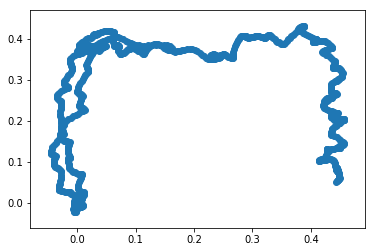

In [40]:
h_x = np.array([x[0] for x in h_pos[:1000]])
h_y = np.array([x[1] for x in h_pos[:1000]])
plt.scatter(h_x, h_y)
plt.show()

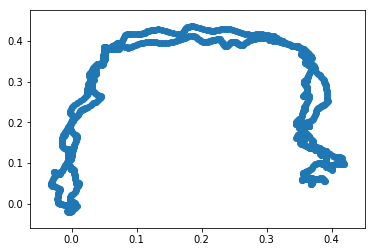

In [41]:
b_x = np.array([x[0] for x in b_pos[:1000]])
b_y = np.array([x[1] for x in b_pos[:1000]])
plt.scatter(b_x, b_y)
plt.show()

In [7]:
h_act = h_first.action
b_act = b_first.action
print(b_act.shape)
# plt.scatter(h_act)
# plt.show()


torch.Size([1000, 8])


In [8]:
h_act = h_act.squeeze(1)

In [9]:
h_act = h_act.detach().cpu().numpy()
b_act = b_act.detach().cpu().numpy()

In [11]:
import matplotlib.pyplot as plt

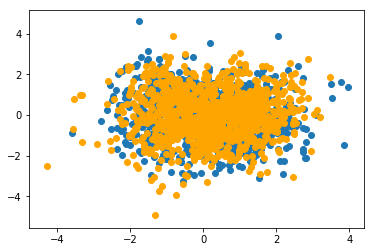

In [13]:
plt.scatter(b_act[:, 0], b_act[:, 1])
plt.scatter(h_act[:, 0], h_act[:, 1], color='orange')
plt.show()

In [45]:
h_act.shape

torch.Size([1000, 1, 8])

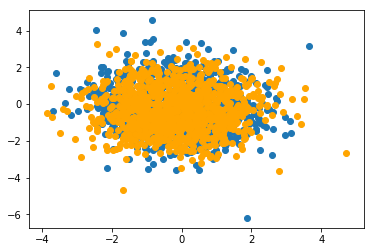

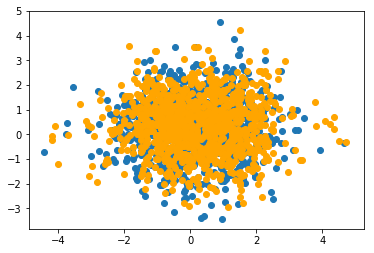

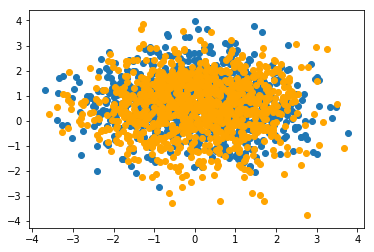

In [48]:
plt.scatter(b_act[:, 2].detach().cpu().numpy(), b_act[:, 3].detach().cpu().numpy())
plt.scatter(h_act[:, 2].detach().cpu().numpy(), h_act[:, 3].detach().cpu().numpy(), color='orange')
plt.show()
plt.scatter(b_act[:, 4].detach().cpu().numpy(), b_act[:, 5].detach().cpu().numpy())
plt.scatter(h_act[:, 4].detach().cpu().numpy(), h_act[:, 5].detach().cpu().numpy(), color='orange')
plt.show()
plt.scatter(b_act[:, 6].detach().cpu().numpy(), b_act[:, 7].detach().cpu().numpy())
plt.scatter(h_act[:, 6].detach().cpu().numpy(), h_act[:, 7].detach().cpu().numpy(), color='orange')
plt.show()

# Compare Ours to Theirs

In [ ]:
# loop through
theirs = load('/home/olivia/Teachable/original_babyai/demos/T322_L18_MATCHING_THEIRS.pkl')

for i, their_traj in enumerate(theirs):
    if i % 1000 == 0:
        print(i)
    ours = load(f'/home/olivia/Teachable/babyai/meta-mb-internal/data/'
                'T0330_COLLECT_MATCHING_L18_v3_teacherPreActionAdvice_dense_threshS0.99_threshA0.8_lr0.0001_ent0.01_currfnone_hot_1'
                f'/buffer/traj_train_level18_idx{i}.pkl')
#     print(to_text(ours.obs[0]['instr']))
#     print(ours.teacher_action[:,0])

    # actions
    their_action = np.array([t for t in their_traj[3]])
    assert np.array_equal(ours.teacher_action[:,0], their_action), (ours.teacher_action, their_action)
    
    # obs
#     print("comparing obs")
    our_obs = ours.obs
    their_obs = blosc.unpack_array(their_traj[1])
    for oo, to in zip(our_obs, their_obs):
        assert np.array_equal(oo['obs'], to), (oo['obs'].shape, to.shape)

#     print("first")
    assert np.array_equal(ours.obs[0]['obs'], their_obs[0]), (ours.obs[0]['obs'].shape, their_obs[0].shape)
    
    # instr
    their_mission_tokens = to_vocab_index(their_traj[0])
    our_mission_tokens = ours.obs[0]['instr']
    assert np.array_equal(their_mission_tokens, our_mission_tokens), (their_mission_tokens, our_mission_tokens)
    
print("all good!")

In [ ]:
for t in theirs[:10]:
    print(t[0])

# Compare theirs to theirs

In [ ]:
theirs_1 = load('/home/olivia/Teachable/original_babyai/demos/T322_L18_MATCHING_THEIRS.pkl')
# theirs_2 = load('/home/olivia/Teachable/original_babyai/demos/T322_L18_MATCHING_THEIRS.pkl')

In [ ]:
(len(theirs_1), len(theirs_2))

In [ ]:
i = 0
for traj_1, traj_2 in zip(theirs_1, theirs_2):
    print(np.array(traj_1[3]).astype(np.int32))
    print(traj_2[3])
    if i % 100 == 0:
        print(i)
    assert traj_1[0] == traj_2[0], (traj_1[0], traj_2[0])
    obs_1 = blosc.unpack_array(traj_1[1])
    obs_2 = blosc.unpack_array(traj_2[1])
    assert np.array_equal(obs_1, obs_2)
    assert np.array_equal(traj_1[3], traj_2[3])
    i += 1

In [ ]:
avg = np.mean([len(traj[3]) for traj in theirs_1[:1000]])
print(avg)

In [ ]:
avg = np.mean([traj[3] for traj in theirs_1])
print(avg)

# Compare Ours to Ours

In [ ]:
for i in range(323000):
    print(i)
    ours_1 = load(f'/home/olivia/Teachable/babyai/meta-mb-internal/data/'
                'T0330_GOOD_DATASET_L18'
                f'/buffer/traj_train_level18_idx{i}.pkl')
    ours_2 = load(f'/home/olivia/Teachable/babyai/meta-mb-internal/data/'
                'T0330_COLLECT_MATCHING_L18_v3_teacherPreActionAdvice_dense_threshS0.99_threshA0.8_lr0.0001_ent0.01_currfnone_hot_1'
                f'/buffer/traj_train_level18_idx{i}.pkl')
    
    assert np.array_equal(ours_1.teacher_action, ours_2.teacher_action)